In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns

sns.set()

In [96]:
#Select the datasource
path='D:\Aktienanalysen\DAX'
path='/'.join(path.split('\\'))
path=path+'/GDAXI.csv'


In [97]:
# Assign the data to a dataframe
raw_data=pd.read_csv(path)
df=raw_data.copy()

# EDA of the Dataframe and some adjustment

In [98]:
df_close=df.copy()
del df_close['Open'],df_close['High'],df_close['Low'],df_close['Adj Close'],df_close['Volume']


In [99]:
df_close['Date']=pd.to_datetime(df_close['Date'],yearfirst=True)
df_close.set_index('Date',inplace=True)

In [100]:
df_close=df_close.asfreq('b')
df_close.dropna(axis=0,inplace=True)

<AxesSubplot:xlabel='Date'>

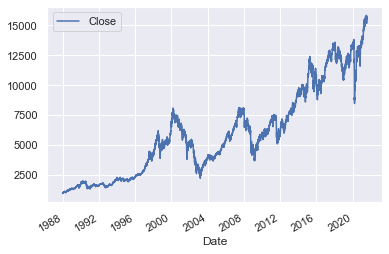

In [101]:
df_close.plot()

## Different transformations

In [114]:
df_close['diff_abs']=df_close['Close'].diff()
df_close['diff_pct']=df_close.Close.pct_change()
df_close['log']=np.log(df_close.Close)
df_close['rm']=df_close.Close.rolling(window=7).mean().fillna(method='bfill')
df_close['benchmark_rm']=df_close.Close/df_close.rm

In [118]:
df_close=df_close[1:]

In [150]:
for col in df_close.columns:
    print(f'The aduller for {col!r} is:'+ '\n'
          +str(f't-value: {sts.adfuller(df_close[col])[0]}')+ '\n'+ 
         str(f'p-value: {sts.adfuller(df_close[col])[1]}') + '\n' + 
         str(f'The CI of are: {sts.adfuller(df_close[col])[4]}')
         + '\n' + '\n'
         )

The aduller for 'Close' is:
t-value: 0.03180014455806099
p-value: 0.9610842464619547
The CI of are: {'1%': -3.431123933643013, '5%': -2.861882025734385, '10%': -2.5669520554126093}


The aduller for 'diff_abs' is:
t-value: -17.553236339058486
p-value: 4.1321709304791085e-30
The CI of are: {'1%': -3.431123842057912, '5%': -2.8618819852653057, '10%': -2.566952033870585}


The aduller for 'diff_pct' is:
t-value: -39.36025806955885
p-value: 0.0
The CI of are: {'1%': -3.431121832655443, '5%': -2.861881097362181, '10%': -2.5669515612324987}


The aduller for 'log' is:
t-value: -1.4697372590101612
p-value: 0.5484252583940928
The CI of are: {'1%': -3.4311219237655033, '5%': -2.8618811376213795, '10%': -2.566951582662797}


The aduller for 'rm' is:
t-value: -0.13188219912018107
p-value: 0.9461688886447042
The CI of are: {'1%': -3.4311247588854887, '5%': -2.861882390387565, '10%': -2.5669522495205075}


The aduller for 'benchmark_rm' is:
t-value: -15.681802910916907
p-value: 1.4696000512237567e-

Ass seen abouve, the pct_change performe much better to be stationary than the others transformations.<br>
Even the diff. abs is also a good choise, the pct_change will be used from now

<AxesSubplot:xlabel='Date'>

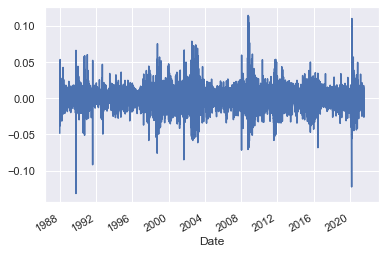

In [153]:
df_close.diff_pct.plot()

### Finding number of lags for AR

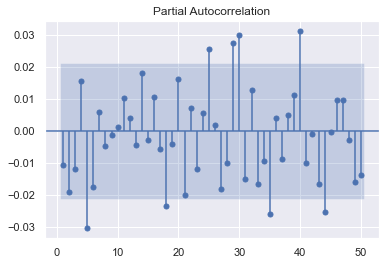

In [162]:
sgt.plot_pacf(df_close.diff_pct,zero=False,lags=50);

In [ ]:
model_ar=ARMA(df_close.diff_pct,order=(30,0))
model_ar_res=model_ar.fit()
model_ar_res.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency